In [31]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, \
              recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, \
              auc, mean_squared_error, accuracy_score
import math
plt.rcParams["figure.figsize"] = (12,6)
from sklearn.model_selection import cross_val_score

Прочитайте данные из файла.

Определите оптимальное количество кластеров для прочитанных данных.

Постройте оптимальное разбиение на кластеры.

Спрогнозируйте классы для векторов
[-0.1805, -0.0659, -0.465199, 0.187700, -0.21910998]
и [0.2226875, -0.133287, 2.8845, 3.2772081, 2.93884]

Постройте график метрики "силуэт" в зависимости от количества кластеров

In [32]:
X = pd.read_csv('X.csv', sep=" ", header=None)

In [33]:
X

,0,1,2,3,4
0,0.149014,0.097225,-0.424611,0.075148,0.107336
1,-0.041479,-0.115525,-0.126194,0.103934,0.168235
2,0.194307,-0.203077,-0.102814,-0.204007,0.324915
3,0.456909,0.183503,-0.240683,0.069676,0.316141
4,-0.070246,0.309300,-0.048386,0.087922,-0.413301
...,...,...,...,...,...
295,4.970333,4.554531,5.055404,4.804593,5.601828
296,5.275723,4.233824,4.595862,4.841415,5.618451
297,4.912918,5.280296,4.708516,5.175909,5.362510
298,5.080218,4.589936,5.360124,5.371485,5.307219


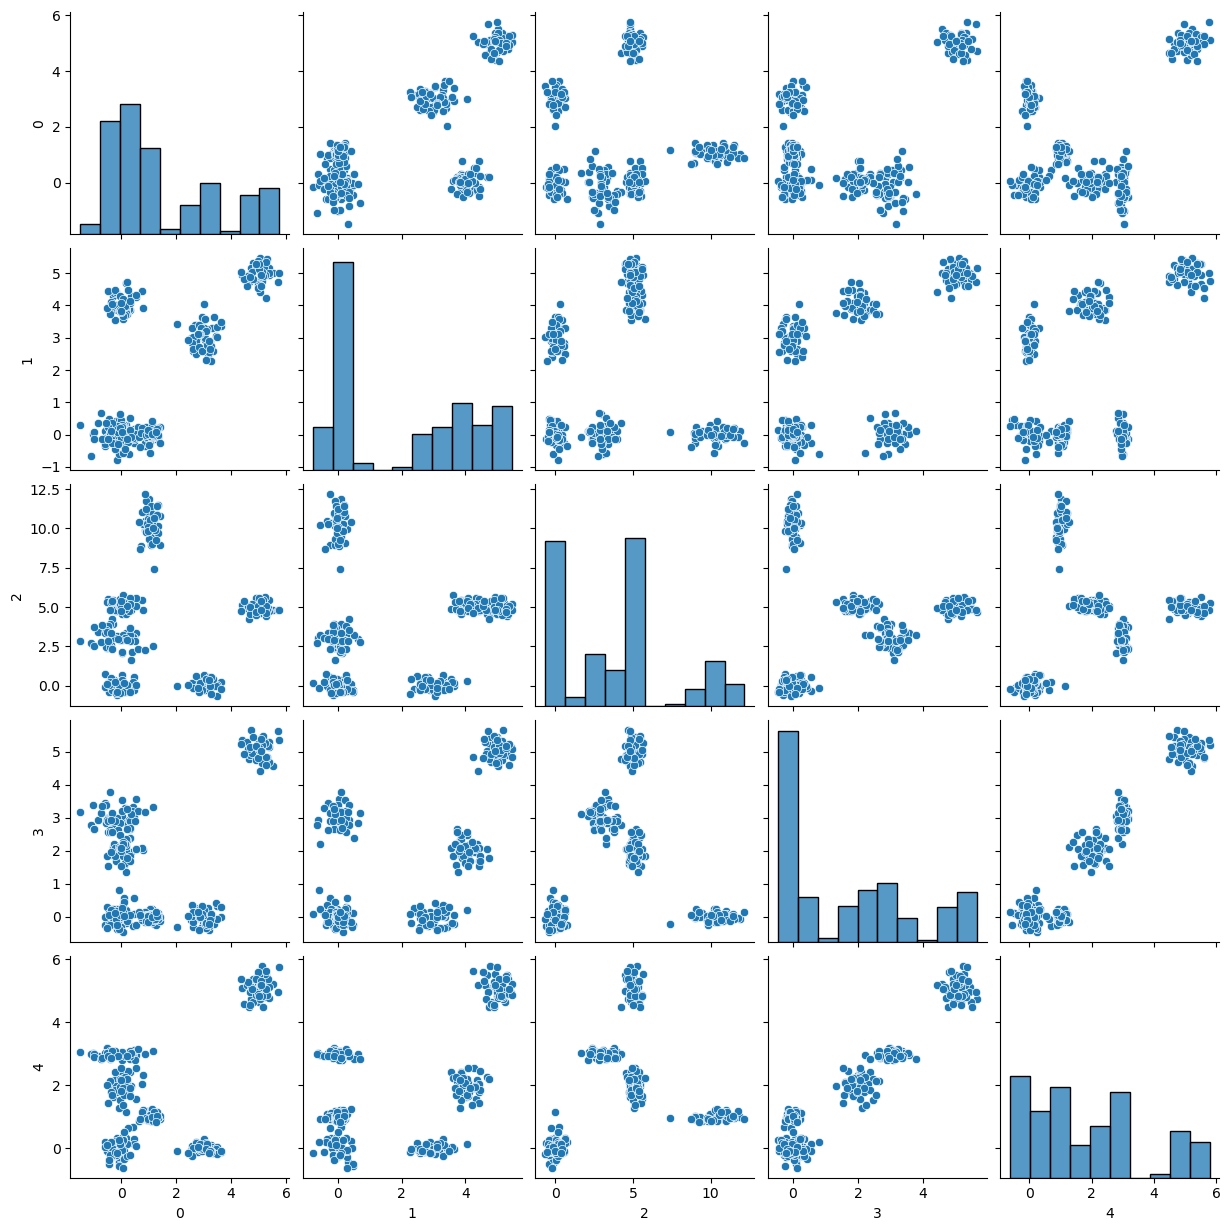

In [34]:
sns.pairplot(X);

Определите оптимальное количество кластеров для прочитанных данных.

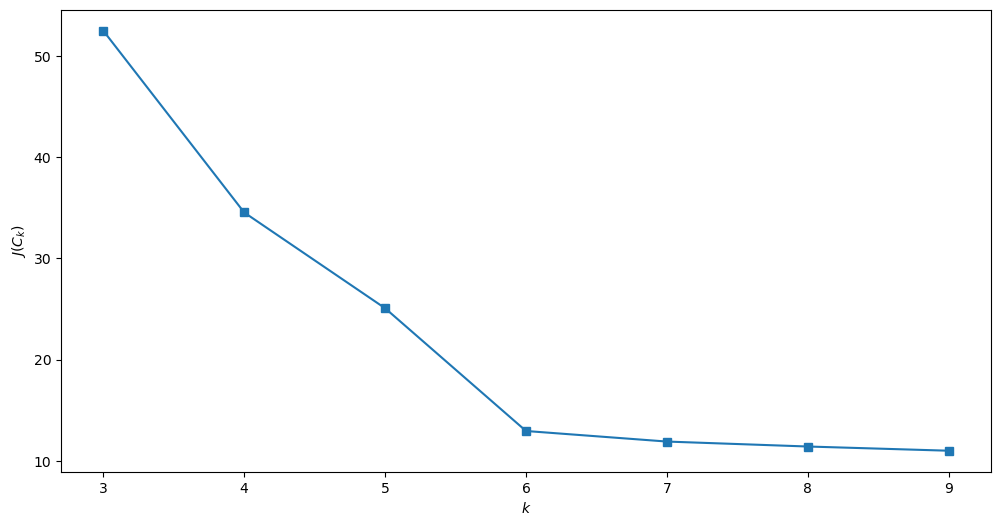

In [39]:
from sklearn.cluster import KMeans

inertia = []
for k in range(3, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(3, 10), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

In [37]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=1).fit(X)
pred = kmeans.predict(X)

In [38]:
from sklearn import metrics
metrics.silhouette_score(X, pred)

0.8122759257111298

Постройте оптимальное разбиение на кластеры.

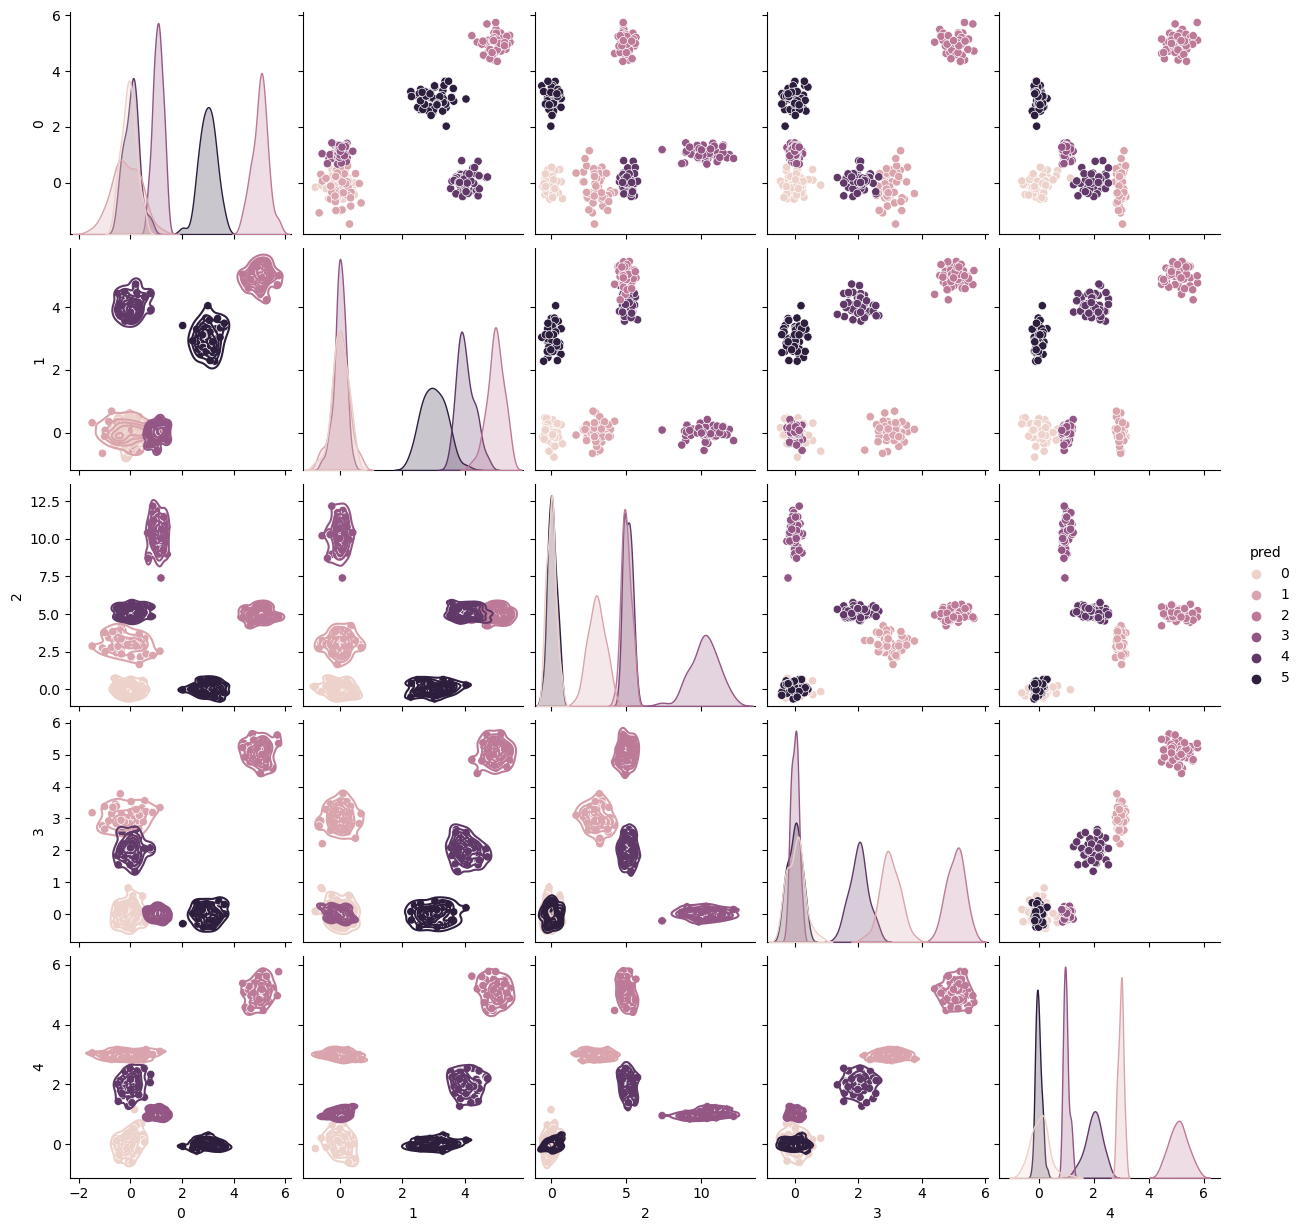

In [42]:
X["pred"] = pred
g = sns.pairplot(data = X, hue="pred")
g.map_lower(sns.kdeplot);

Спрогнозируйте классы для векторов
[-0.1805, -0.0659, -0.465199, 0.187700, -0.21910998]
и [0.2226875, -0.133287, 2.8845, 3.2772081, 2.93884]

In [40]:
vekt1 = [-0.1805, -0.0659, -0.465199, 0.187700, -0.21910998]
vekt2 = [0.2226875, -0.133287, 2.8845, 3.2772081, 2.93884]

In [46]:
kmeans.predict([vekt1])

array([1], dtype=int32)

In [44]:
kmeans.predict([vekt2])

array([4], dtype=int32)

Постройте график метрики "силуэт" в зависимости от количества кластеров

/Users/Ulyana/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/Ulyana/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/Ulyana/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/Ulyana/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised i

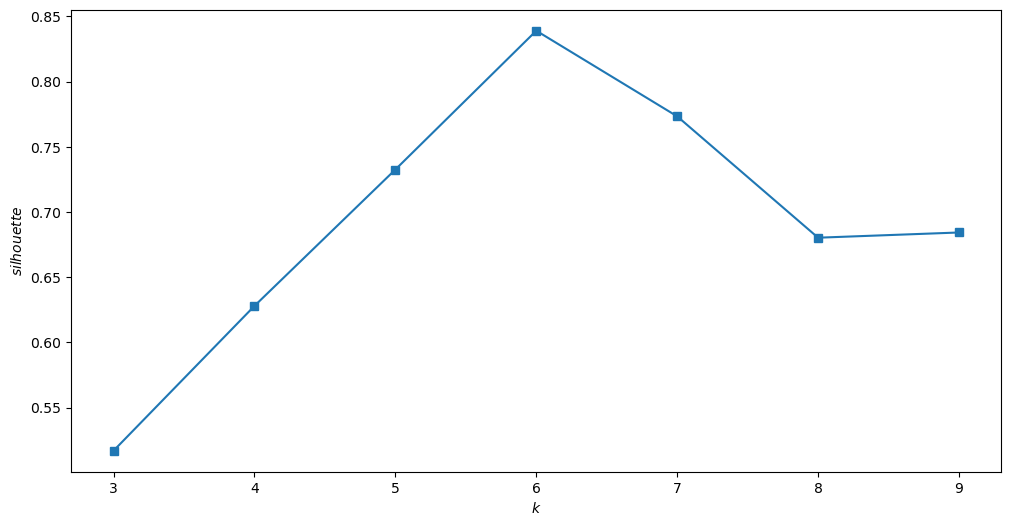

In [49]:
from sklearn.cluster import KMeans
from sklearn import metrics

inertia = []
for k in range(3, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    pred = kmeans.predict(X)
    inertia.append(metrics.silhouette_score(X, pred))

plt.plot(range(3, 10), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$silhouette$');